# Project #4: Data Wrangling For WeRateDogs Database

## Introduction:
The following notebook will deal with the 

## Contents

### Data Gathering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
from PIL import Image
from io import BytesIO
from sqlalchemy import create_engine

In [2]:
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_pred = pd.read_csv(image_predictions_url, sep='\t')

In [3]:
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [5]:
with open('tweet-json.txt', encoding='utf-8') as file:
    print(len(file.readlines()))

2354


In [6]:
refavid =[]
with open('tweet-json.txt', encoding='utf-8') as file:
    for line in range(2333):
        line = file.readline()
        data = {}
        content = line.strip('{').strip('}').split(',')
        for item in content:
            if ':' in item:
                key, value = item.split(':', 1)
                data[key] = value
            else:
                pass
        favorite_count = data[' "favorite_count"']
        retweet_count = data[' "retweet_count"']
        tweet_id = data[' "id"']
        refavid.append({'favorite_count':int(favorite_count), 'retweet_count':int(retweet_count), 'tweet_id':tweet_id})
refavid

[{'favorite_count': 39467,
  'retweet_count': 8853,
  'tweet_id': ' 892420643555336193'},
 {'favorite_count': 33819,
  'retweet_count': 6514,
  'tweet_id': ' 892177421306343426'},
 {'favorite_count': 25461,
  'retweet_count': 4328,
  'tweet_id': ' 891815181378084864'},
 {'favorite_count': 42908,
  'retweet_count': 8964,
  'tweet_id': ' 891689557279858688'},
 {'favorite_count': 41048,
  'retweet_count': 9774,
  'tweet_id': ' 891327558926688256'},
 {'favorite_count': 20562,
  'retweet_count': 3261,
  'tweet_id': ' 891087950875897856'},
 {'favorite_count': 12041,
  'retweet_count': 2158,
  'tweet_id': ' 890971913173991426'},
 {'favorite_count': 56848,
  'retweet_count': 16716,
  'tweet_id': ' 890729181411237888'},
 {'favorite_count': 28226,
  'retweet_count': 4429,
  'tweet_id': ' 890609185150312448'},
 {'favorite_count': 32467,
  'retweet_count': 7711,
  'tweet_id': ' 890240255349198849'},
 {'favorite_count': 31166,
  'retweet_count': 7624,
  'tweet_id': ' 890006608113172480'},
 {'favori

In [7]:
json_df = pd.DataFrame(refavid, columns=['tweet_id','favorite_count', 'retweet_count'])
json_df

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [8]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null object
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [9]:
json_df.tweet_id.duplicated().sum()

179

### Data Assessment

#### Visual Assessment

In [10]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Programmatic Assessment

In [11]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
908,700505138482569216,https://pbs.twimg.com/media/Cbixs3vUUAAqHHN.jpg,1,bath_towel,0.449684,False,Norwegian_elkhound,0.160205,True,Great_Dane,0.048666,True
656,682259524040966145,https://pbs.twimg.com/media/CXffar9WYAArfpw.jpg,1,Siberian_husky,0.439670,True,Eskimo_dog,0.340474,True,malamute,0.101253,True
1608,800751577355128832,https://pbs.twimg.com/media/CxzXOyBW8AEu_Oi.jpg,2,cocker_spaniel,0.771984,True,miniature_poodle,0.076653,True,toy_poodle,0.039618,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
589,679132435750195208,https://pbs.twimg.com/media/CWzDWOkXAAAP0k7.jpg,1,Scottish_deerhound,0.194610,True,Irish_wolfhound,0.162855,True,giant_schnauzer,0.159837,True
2036,884441805382717440,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,Pembroke,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True
379,673270968295534593,https://pbs.twimg.com/media/CVfwXuWWIAAqnoi.jpg,1,Shih-Tzu,0.610453,True,Maltese_dog,0.166815,True,Old_English_sheepdog,0.132015,True
236,670428280563085312,https://pbs.twimg.com/media/CU3W9ELWEAEdUA0.jpg,1,chow,0.335269,True,golden_retriever,0.305850,True,Tibetan_mastiff,0.063325,True
1488,782305867769217024,https://pbs.twimg.com/media/CttPBt0WIAAcsDE.jpg,1,briard,0.504427,True,soft-coated_wheaten_terrier,0.390678,True,Lhasa,0.034596,True


In [13]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
image_pred['tweet_id'].duplicated().sum()

0

In [15]:
twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Programmatic assessment

In [16]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
twitter_arch[twitter_arch['rating_denominator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [19]:
print('doggo {}'.format(twitter_arch.doggo.value_counts()[1]))
print('floofer {}'.format(twitter_arch.floofer.value_counts()[1]))
print('pupper {}'.format(twitter_arch.pupper.value_counts()[1]))
print('puppo {}'.format(twitter_arch.puppo.value_counts()[1]))

doggo 97
floofer 10
pupper 257
puppo 30


In [20]:
twitter_arch[twitter_arch['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [21]:
twitter_arch[twitter_arch['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [22]:
twitter_arch['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
twitter_arch['tweet_id'].duplicated().sum()

0

In [24]:
twitter_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1669,682429480204398592,NaN,NaN,2015-12-31 05:14:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know we joke around on here, but this is get...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/682429480...,8,10,None,None,None,None,None
1777,677918531514703872,NaN,NaN,2015-12-18 18:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Everything looks pretty good in there. Make s...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/677918531...,10,10,None,None,None,None,None
772,776477788987613185,NaN,NaN,2016-09-15 17:48:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Huck. He's addicted to caffeine. Hope ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776477788...,11,10,Huck,None,None,pupper,None
2330,666362758909284353,NaN,NaN,2015-11-16 21:10:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Very small. Lives in containe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666362758...,6,10,None,None,None,None,None
1150,726224900189511680,NaN,NaN,2016-04-30 01:41:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm getting super heckin frustrated with you a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726224900...,9,10,None,None,None,None,None
1496,692530551048294401,NaN,NaN,2016-01-28 02:12:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cody. He's been to like 80 countr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692530551...,10,10,Cody,None,None,None,None
1287,708356463048204288,NaN,NaN,2016-03-11 18:18:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. That is his castle. He protect...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708356463...,10,10,Oliver,None,None,None,None
1683,681694085539872773,NaN,NaN,2015-12-29 04:31:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a Benedoop Cumbersnatch. Seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
500,813112105746448384,NaN,NaN,2016-12-25 20:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's pupset because his hat isn't b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813112105...,12,10,Toby,None,None,None,None
232,847962785489326080,NaN,NaN,2017-04-01 00:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847962785...,10,10,Georgie,None,None,None,None


In [25]:
twitter_arch.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Bailey         7
Daisy          7
an             7
Toby           7
Buddy          7
Milo           6
Dave           6
Oscar          6
Scout          6
Leo            6
Bella          6
Koda           6
Jax            6
Jack           6
Stanley        6
Rusty          6
George         5
            ... 
Karl           1
Beemo          1
Julius         1
Maisey         1
Izzy           1
Fwed           1
Billy          1
Winifred       1
Mack           1
Howie          1
Beebop         1
Rose           1
Arnold         1
Rizzo          1
Margo          1
Hubertson      1
Chase          1
Edd            1
Tedrick        1
Rover          1
Sailor         1
Aubie          1
Bayley         1
Florence       1
Devón          1
Nida           1
Ronduh         1
Mo            

In [26]:
twitter_arch[twitter_arch['name'] == 'an']['text']

759     RT @dog_rates: This is an East African Chalupa...
1025    This is an Iraqi Speed Kangaroo. It is not a d...
1362    This is an East African Chalupa Seal. We only ...
2204    This is an Irish Rigatoni terrier named Berta....
2333    This is an extremely rare horned Parthenon. No...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2349    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

In [27]:
twitter_arch[twitter_arch.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [28]:
twitter_arch.tweet_id.duplicated().sum()

0

In [29]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null object
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


##### Tidiness issues:
`T1.` Dog stages should be in one column.<br>
`T2.` all tables should be one table.<br>

##### Quality issues:
`Q1.` 'tweet_id's should be object instead of int in all df's also 'favorite_count' and 'retweet_count' should be int type instead of float.<br>
`Q2.` Retweets included in the table.<br>
`Q3.` 'timestamp' column should be timestamp dtype.<br>
`Q4.` Zero numerator, denominator rows.<br>
`Q5.` denominator > 10<br>
`Q6.` image_pred df has 2075 entries while twitter_arch has 2356 entries.<br>
`Q7.` All algorithm columns (p1,p2 and p3) inconsistent with the first letter either capital or small.<br>
`Q8.` Undescriptive column names.<br>
`Q9.` 'source' column has only 4 values that are not readable.<br>
`Q10.` 'a','an' and 'the' values in 'name' column.

### Data Cleaning

In [30]:
twitter_arch_clean = twitter_arch.copy()
image_pred_clean = image_pred.copy()

`T1.` Dog stages should be in one column.

##### Define 
last four columns of twitter_arch_clean df will be milted together in one column called 'dog_stage' through replacing "None" values with "" then adding all strings in four columns together in dog_stage column then the four columns in question will be dropped out of the df.

In [31]:
twitter_arch_clean[['doggo', 'floofer', 'pupper', 'puppo']] = twitter_arch_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')

In [32]:
twitter_arch_clean['dog_stage'] = twitter_arch_clean['doggo'] + twitter_arch_clean['floofer'] + twitter_arch_clean['pupper'] + twitter_arch_clean['puppo']

In [33]:
twitter_arch_clean = twitter_arch_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [34]:
twitter_arch_clean.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [35]:
twitter_arch_clean.dog_stage = twitter_arch_clean.dog_stage.replace('doggopupper', 'multiple')
twitter_arch_clean.dog_stage = twitter_arch_clean.dog_stage.replace('doggopuppo', 'multiple')
twitter_arch_clean.dog_stage = twitter_arch_clean.dog_stage.replace('doggofloofer', 'multiple')
twitter_arch_clean.dog_stage = twitter_arch_clean.dog_stage.replace('', 'None')

##### Test

In [36]:
twitter_arch_clean.dog_stage.value_counts()

None        1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: dog_stage, dtype: int64

`T2.` All tables should be in one table

##### Define
json_df and twitter_arch_clean and image_predc will be merged together through merge statement

In [37]:
twitter_arch_clean.tweet_id = twitter_arch_clean.tweet_id.astype(int)
json_df.tweet_id = json_df.tweet_id.astype(int)
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype(int)

In [38]:
twitter_arch_clean = pd.merge(twitter_arch_clean, json_df, on='tweet_id', how='left')
twitter_arch_clean = pd.merge(twitter_arch_clean, image_pred_clean, on='tweet_id', how='left')

##### Test

In [39]:
twitter_arch_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [40]:
twitter_arch_clean.shape

(2508, 27)

`Q1.` 'tweet_id' should be object instead of int

##### Define
Change the above column to their proper types dtype.

In [41]:
twitter_arch_clean.tweet_id = twitter_arch_clean.tweet_id.astype(str)

`Q2.` Retweets included in the the table.

##### Define
Drop all retweeted data from our table then drop 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp' columns

In [42]:
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean['retweeted_status_id'].isnull()]

In [43]:
twitter_arch_clean = twitter_arch_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

##### Test

In [44]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2507
Data columns (total 22 columns):
tweet_id              2327 non-null object
timestamp             2327 non-null object
source                2327 non-null object
text                  2327 non-null object
expanded_urls         2269 non-null object
rating_numerator      2327 non-null int64
rating_denominator    2327 non-null int64
name                  2327 non-null object
dog_stage             2327 non-null object
favorite_count        2203 non-null float64
retweet_count         2203 non-null float64
jpg_url               2135 non-null object
img_num               2135 non-null float64
p1                    2135 non-null object
p1_conf               2135 non-null float64
p1_dog                2135 non-null object
p2                    2135 non-null object
p2_conf               2135 non-null float64
p2_dog                2135 non-null object
p3                    2135 non-null object
p3_conf               2135 non

`Q3.` 'timestamp' column should be timestamp dtype.

##### Define
change time stamp from object type to timestamp type.

In [45]:
twitter_arch_clean.timestamp = pd.to_datetime(twitter_arch_clean.timestamp)

##### Test

In [46]:
twitter_arch_clean.timestamp.dtype

dtype('<M8[ns]')

`Q4.` Zero numerator, denominator rows.

In [47]:
twitter_arch_clean[twitter_arch_clean['rating_numerator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
332,835152434251116546,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,24574.0,...,3.0,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True
1115,746906459439529985,2016-06-26 03:22:31,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0,10,None,None,3168.0,...,1.0,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False


##### Define
After merging both dataframes the zero denomenator disappeared and only 2 rows left with zero numerator so I will check them manually and change them upon this process.
After checking the manually tweet both rows will be dropped from both dataframes because the first one is a joke clearly and the second one is non dog related.

In [48]:
twitter_arch_clean = twitter_arch_clean[~(twitter_arch_clean['tweet_id'] == '835152434251116546')]
twitter_arch_clean = twitter_arch_clean[~(twitter_arch_clean['tweet_id'] == '746906459439529985')]

##### Test 

In [49]:
twitter_arch_clean[twitter_arch_clean['rating_numerator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [50]:
twitter_arch_clean.shape

(2325, 22)

`Q5.` denominator != 10

In [51]:
twitter_arch_clean[twitter_arch_clean['rating_denominator'] != 10]['rating_denominator'].value_counts().sum()

23

##### Define
drop all rows with denomiantor > 10 or <10

In [52]:
twitter_arch_clean = twitter_arch_clean[~(twitter_arch_clean['rating_denominator'] != 10)]

##### Test

In [53]:
twitter_arch_clean[twitter_arch_clean['rating_denominator'] != 10]['rating_denominator'].value_counts()

Series([], Name: rating_denominator, dtype: int64)

In [54]:
twitter_arch_clean.shape

(2302, 22)

`Q6.` image_pred df has 2075 entries while twitter_arch has 2356 entries.

##### Define
All tweets without image will be dropped.

In [55]:
twitter_arch_clean['jpg_url'].isnull().sum()

188

In [56]:
twitter_arch_clean = twitter_arch_clean[~(twitter_arch_clean['jpg_url'].isnull())]

##### Test

In [57]:
twitter_arch_clean['jpg_url'].isnull().sum()

0

In [58]:
twitter_arch_clean.shape

(2114, 22)

`Q7.` All algorithm columns (p1,p2 and p3) incossistent with the first letter either capital or small.

##### Define
Change the first letter of each value to capital

In [59]:
twitter_arch_clean.p1 = twitter_arch_clean.p1.str.title()
twitter_arch_clean.p2 = twitter_arch_clean.p2.str.title()
twitter_arch_clean.p3 = twitter_arch_clean.p3.str.title()

##### Test

In [60]:
twitter_arch_clean.p1.value_counts().head(10)

Golden_Retriever      153
Labrador_Retriever    101
Pembroke               91
Chihuahua              84
Pug                    56
Samoyed                45
Chow                   45
Toy_Poodle             42
Pomeranian             41
French_Bulldog         32
Name: p1, dtype: int64

In [61]:
twitter_arch_clean.p2.value_counts().head(10)

Labrador_Retriever          107
Golden_Retriever             91
Cardigan                     77
Pomeranian                   44
Chesapeake_Bay_Retriever     43
Chihuahua                    43
French_Bulldog               41
Siberian_Husky               37
Toy_Poodle                   37
Miniature_Poodle             35
Name: p2, dtype: int64

In [62]:
twitter_arch_clean.p3.value_counts().head(10)

Labrador_Retriever           81
Chihuahua                    58
Golden_Retriever             47
Eskimo_Dog                   37
Kuvasz                       35
Kelpie                       35
Staffordshire_Bullterrier    34
Chow                         33
Beagle                       32
Cocker_Spaniel               31
Name: p3, dtype: int64

`Q8.` Undescriptive column names.

##### Define
Change the columns p1,p1_conf,p1_dog,..... to descriptive column names

In [63]:
twitter_arch_clean = twitter_arch_clean.rename(columns={'p1': 'predection1_dog_type',
                                                        'p1_conf': 'predection1_confidence',
                                                        'p1_dog': 'predection1_validity',
                                                        'p2': 'prediction2_dog_type',
                                                        'p2_conf': 'predection2_confidence',
                                                        'p2_dog': 'predection2_validity',
                                                        'p3': 'prediction3_dog_type',
                                                        'p3_conf': 'predection3_confidence',
                                                        'p3_dog': 'predection3_validity'})

##### Test

In [64]:
twitter_arch_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'predection1_dog_type', 'predection1_confidence',
       'predection1_validity', 'prediction2_dog_type',
       'predection2_confidence', 'predection2_validity',
       'prediction3_dog_type', 'predection3_confidence',
       'predection3_validity'],
      dtype='object')

`Q9.` 'source' column has only 4 values that are not readable

##### Define
extract the human readable part of the source type

In [65]:
twitter_arch_clean['source'] = twitter_arch_clean['source'].str.extract('^<a.+>(.+)</a>$')

##### Test

In [66]:
twitter_arch_clean['source'].value_counts()

Twitter for iPhone    2072
Twitter Web Client      30
TweetDeck               12
Name: source, dtype: int64

`Q10.` 'a','an', and 'the' values in 'name' column.

##### Define
As the assessments showed that any name starts with small letter is not an actual name, so any name value starts with small letter will be replaced by 'None', then we will try to find if there is actual names in these tweets because in many of these tweets the actual name is written after word 'named'.

In [67]:
twitter_arch_clean['name'] = np.where(twitter_arch_clean['name'].str[0].str.islower(), 'None', twitter_arch_clean['name'])

In [68]:
len(twitter_arch_clean[twitter_arch_clean['name'] == 'None'])

663

In [69]:
def rename(text):
    text_content = text.split()
    for item in text_content:
        if item.lower() == 'named':
            name_index = text_content.index(item) + 1
            return text_content[name_index]
        else:
            pass
    return np.nan

In [70]:
twitter_arch_clean['name'] = np.where(twitter_arch_clean['name'] == 'None', twitter_arch_clean['text'].apply(rename), twitter_arch_clean['name'])

In [71]:
twitter_arch_clean.name.value_counts()

Charlie      12
Oliver       11
Cooper       11
Tucker       10
Penny        10
Lucy         10
Bo            9
Lola          9
Winston       9
Sadie         8
Toby          7
Buddy         7
Daisy         7
Jax           6
Jack          6
Bella         6
Stanley       6
Koda          6
Scout         6
Leo           6
Milo          6
Dave          6
Bailey        6
Rusty         6
Louis         5
Oakley        5
Chester       5
Gus           5
Larry         5
George        5
             ..
Dudley        1
Rose          1
Howie         1
Halo          1
Gordon        1
Mojo          1
Augie         1
Blipson       1
Tedrick       1
Chase         1
Marq          1
Hubertson     1
Monster       1
Travis        1
Eleanor       1
Beemo         1
Chevy         1
Jordy         1
Kallie        1
Dutch         1
Dug           1
Frönq         1
Stewie        1
Dixie         1
Scruffers     1
Beebop        1
Arnold        1
Rizzo         1
Margo         1
Kanu          1
Name: name, Length: 934,

### Storing Data

In [72]:
twitter_arch_clean.to_csv('twitter_archive_master.csv', sep='\t', encoding='utf-8', index=False)

### Analysis 

In [73]:
df = pd.read_csv('twitter_archive_master.csv', sep='\t')

In [74]:
df['rating_percentage'] = df.rating_numerator/ df.rating_denominator

In [75]:
df.shape

(2114, 23)

#### Insight #1: the most common dog stage

In [76]:
df.dog_stage.value_counts()

None        1779
pupper       218
doggo         71
puppo         26
multiple      13
floofer        7
Name: dog_stage, dtype: int64

#### Insight #2: rating based on dog stage

In [77]:
a = df[df['dog_stage'] == 'doggo']['rating_percentage'].mean()
b = df[df['dog_stage'] == 'pupper']['rating_percentage'].mean()
c = df[df['dog_stage'] == 'puppo']['rating_percentage'].mean()
d = df[df['dog_stage'] == 'floofer']['rating_percentage'].mean()
e = df[df['dog_stage'] == 'multiple']['rating_percentage'].mean()
print('Avg. rating for doggo = {}%'.format(a*100))
print('Avg. rating for pupper = {}%'.format(b*100))
print('Avg. rating for puppo = {}%'.format(c*100))
print('Avg. rating for floofer = {}%'.format(d*100))
print('Avg. rating for multiple = {}%'.format(e*100))

Avg. rating for doggo = 119.15492957746477%
Avg. rating for pupper = 107.33944954128441%
Avg. rating for puppo = 120.76923076923079%
Avg. rating for floofer = 120.0%
Avg. rating for multiple = 113.07692307692305%


#### Insight #3: Top 10 repeated names 

In [78]:
df.name.value_counts().head(10)

Charlie    12
Oliver     11
Cooper     11
Tucker     10
Penny      10
Lucy       10
Bo          9
Lola        9
Winston     9
Sadie       8
Name: name, dtype: int64

In [79]:
df_source = df.groupby('source')['tweet_id'].count()
df_source

source
TweetDeck               12
Twitter Web Client      30
Twitter for iPhone    2072
Name: tweet_id, dtype: int64

#### Visual #1: Relationship between rating_percentage and favorite_count

(0, 1.6)

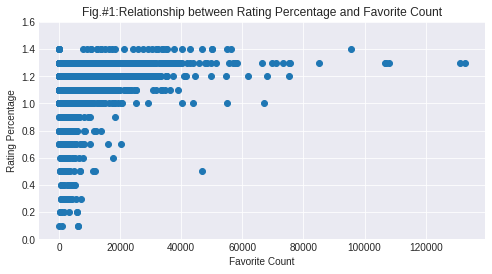

In [80]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(8,4))
plt.scatter(x=df['favorite_count'], y=df['rating_percentage'])
plt.ylabel('Rating Percentage')
plt.xlabel('Favorite Count')
plt.title('Fig.#1:Relationship between Rating Percentage and Favorite Count')
plt.yticks(np.arange(0,2,0.2))
plt.ylim(bottom = 0,top = 1.6)

## Resources 

- www.stackoverflow.com


- www.github.com